# `Seaborn` Visualization

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
sns.set_style("darkgrid")

%matplotlib inline

## `Timeseries` from Dataframes with `tsplot()`

,timepoint,ROI,subject,BOLD signal
0,0,IPS,0,0.513433
1,0,IPS,1,-0.414368
2,0,IPS,2,0.214695
3,0,IPS,3,0.814809


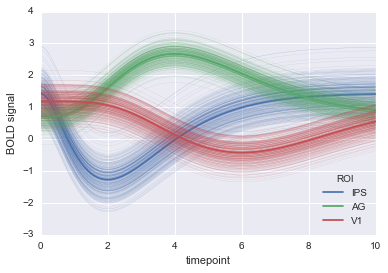

In [57]:
gammas = sns.load_dataset('gammas')

# Plot the response with standard error
sns.tsplot(data=gammas, unit='subject', condition='ROI', value='BOLD signal', 
           time="timepoint", err_style='boot_traces', n_boot=300)
gammas.head(4)

## `Timeseries` data with `tsplot()`

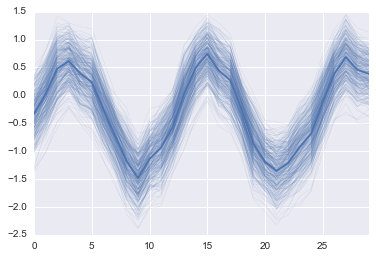

In [3]:
# Create a noisy periodic dataset
sines = []
rs = np.random.RandomState(8)

for _ in range(15):
    x = np.linspace(0, 30/2, 30)
    y = np.sin(x) + rs.normal(0,1.5) + rs.normal(0, .3, 30)
    sines.append(y)

# Plot the average over replicates with bootstrap resamples
sns.tsplot(sines, err_style="boot_traces", n_boot=350)

## `Barplot` timeseries with `factorplot()`

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011


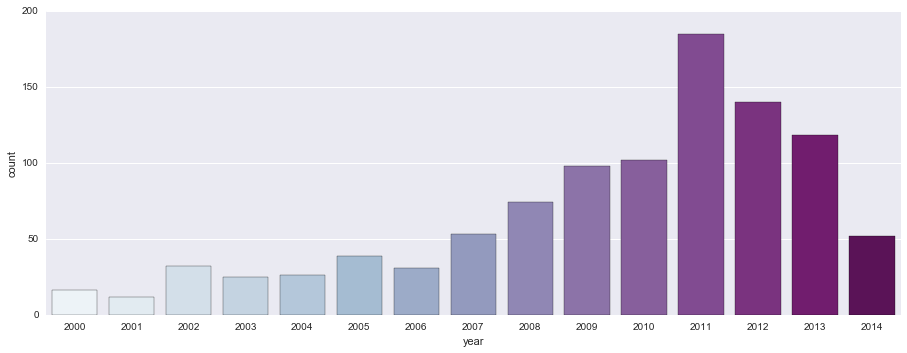

In [29]:
# Load example dataset - planets
planets = sns.load_dataset('planets')

years = np.arange(2000, 2015)
# Draw a count plot to show the number of planets discovered each year
ax = sns.factorplot(x='year', data=planets, kind='count', size=5, order=years, palette='BuPu', aspect=2.5)

planets.head(3)

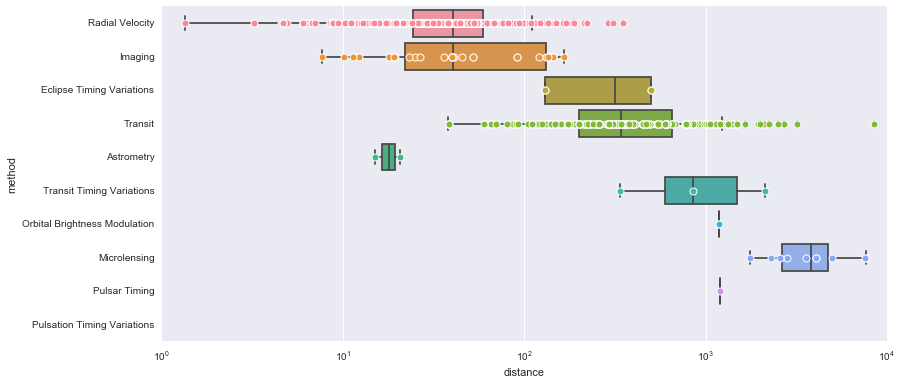

In [55]:
plt.figure(figsize=(13,6)); 
ax = sns.boxplot(data=planets, x="distance", y="method")
ax = sns.stripplot(data=planets, x="distance", y="method", jitter=False)
ax.set_xscale("log")

## `Dot Plot` with several variables with `PairGrid()`

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC
34,23.9,5.497,10.038,23.661,20.554,688.75,109.72,ND
48,23.8,8.092,6.664,23.086,20.706,992.61,152.56,WV


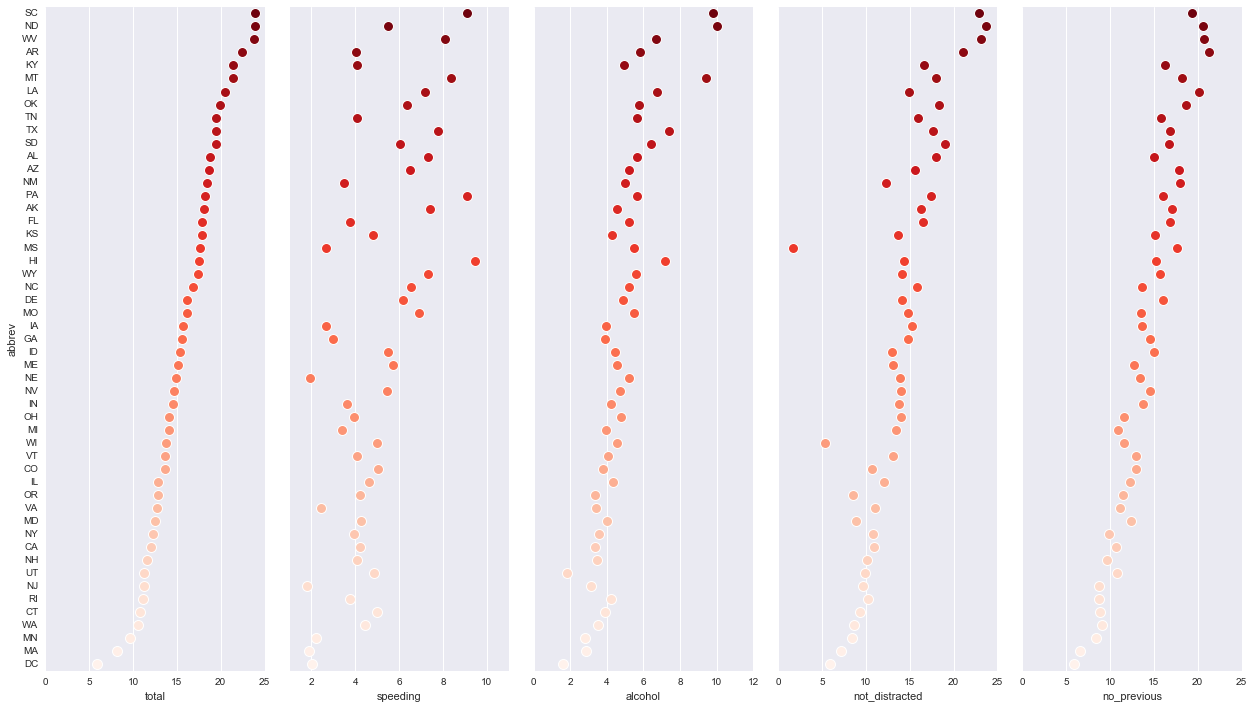

In [5]:
# Load dataset
crashes = sns.load_dataset('car_crashes')
crashes.sort_values("total",  ascending=False, inplace=True)

# Make the pairgrid. Use from last 3 columns. 
ax = sns.PairGrid(crashes, y_vars=["abbrev"], x_vars=crashes.columns[:-3], size=10, aspect=0.35 )

# Draw a dot plot using the stripplot function
ax.map(sns.stripplot, orient='h', size=10, palette='Reds_r')

crashes.head(3)

## `Paired Density` and `Scatterplot` Matrix with `PairGrid()`

/Users/RichardAfolabi/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


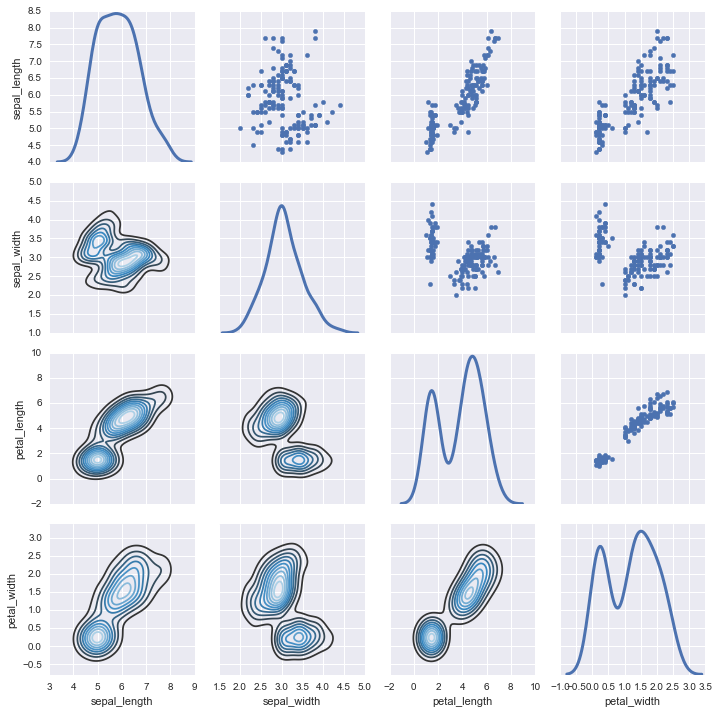

In [61]:
df = sns.load_dataset("iris")
df.head(3)

g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

In [16]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


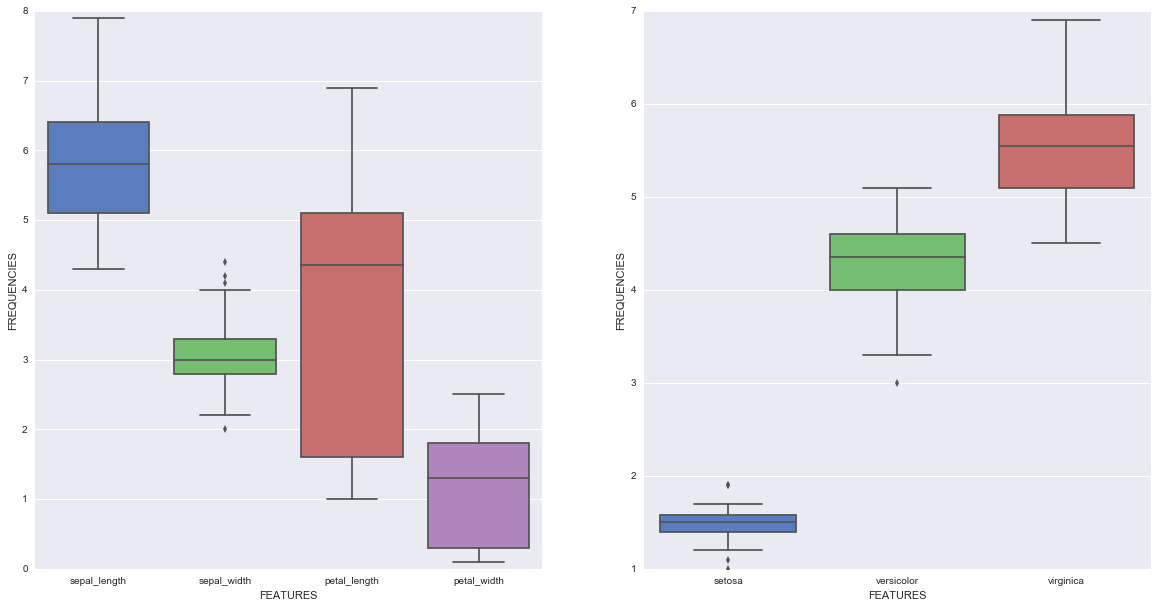

In [29]:


f, axes = plt.subplots(1,2, figsize=(20,10))

ax1 = sns.boxplot(data=iris, ax=axes[0])
ax1.set_xlabel('FEATURES')
ax1.set_ylabel('FREQUENCIES')


ax2 = sns.boxplot(data=iris, y='petal_length', x='species', ax=axes[1])
ax2.set_xlabel('FEATURES')
ax2.set_ylabel('FREQUENCIES')

In [ ]:
iris.head(3)

In [20]:
iris_x.head(3)

,species,measurement,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7


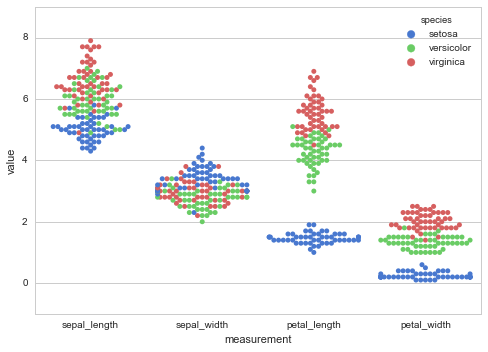

In [21]:

# "Melt" the dataset to "long-form" or "tidy" representation
iris_x = pd.melt(iris, "species", var_name="measurement")

# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="measurement", y="value", hue="species", data=iris_x)
